
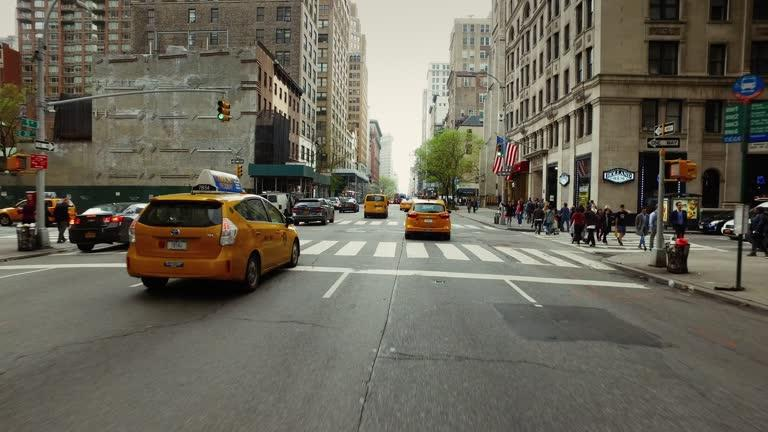

In [1]:
import base64
from io import BytesIO
import pprint

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """

    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "../images/example1.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)



In [17]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

llm = ChatOllama(model="llama3.2-vision", temperature=0)

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            You are to return the description of an image and the importance of the image based on what you can detect.
                
            Imagine you are a guide with the personality of a Gen Alpha influencer so use modern slang, but DO NOT CURSE WHAT SO EVER, you are to take in an image and 
            describe the contents to a blind person, make sure your output is highlighting the obstacles and people in their path so they do not have to run into any trouble. 
            You are to return the description as a string.
            
            Here are some text format instructions:
            Do not repeat phrases at the end of each paragraph, and do not start off with, the image, or any related, output your description as a person not as a robot.
            
            For each item in the output follow these guidelines:
            - The description shouldprovide a clear and concise description of the image, do not make it too long, keep it to two sentences max, for your
            description always include directions when talking about something, also do not start off your response with: the image. In your response make
            sure to respond about whether or not there is space to keep moving forward, if theres anyone or anything they could hit, or if there is any important path blocks
            ahead. Your description should revolve around safety so someone blind can understand the obstacles around them.
            
            
            Output a string for the description, and keep it under two short sentences max.
            """,
        ),
        (
            "human",
            [
                {
                    "type": "image_url",
                    "image_url": {"url": "data:image/jpeg;base64,{image_data}"},
                },
            ],
        ),
    ]
)

chain = prompt | llm | StrOutputParser()

In [22]:
for x in range(3):
    image_path = f'../images/example{x+1}.jpg'
    
    image = Image.open(image_path)
    print(f"Successfully opened image: {image_path} (Format: {image.format}, Size: {image.size}, Mode: {image.mode})")
    
    image_b64 = convert_to_base64(image)
    query = chain.invoke(
        {"image_data": image_b64}
    )

    print(query, '\n\n')

Successfully opened image: ../images/example1.jpg (Format: JPEG, Size: (768, 432), Mode: RGB)
Okay, so I'm looking at this image of a city street with tall buildings on either side. There's a yellow taxi in front of you, driving away from you, and there are cars parked along the curb to your left. The sidewalk is clear, but there's a big trash can right in front of you that you'll need to step over or around. 


Successfully opened image: ../images/example2.jpg (Format: JPEG, Size: (768, 432), Mode: RGB)
Okay so I'm standing in front of what looks like a small cafe or restaurant with some outdoor seating. There's a sidewalk that runs along the building and there are several tables and chairs set up outside, but they're not very close to each other so you should be able to walk through without any issues. The sidewalk is pretty clear and I don't see any obstacles in your path, just make sure to watch out for people walking by or sitting at the tables. 


Successfully opened image: ../im